In [2]:
import pandas as pandas
import matplotlib.pyplot as matplot
import seaborn as sns

trainDataframe = pandas.read_csv("./train.txt", header=None, delimiter=r"\s+")

print(trainDataframe)

        0    1        2       3      4       5       6        7        8   \
0        1    1  10.0047  0.2501   20.0  489.05  604.13  1499.45  1309.95   
1        1    2   0.0015  0.0003  100.0  518.67  642.13  1584.55  1403.96   
2        1    3  34.9986  0.8401   60.0  449.44  555.42  1368.17  1122.49   
3        1    4  20.0031  0.7005    0.0  491.19  607.03  1488.44  1249.18   
4        1    5  42.0041  0.8405   40.0  445.00  549.52  1354.48  1124.32   
...    ...  ...      ...     ...    ...     ...     ...      ...      ...   
45913  218  129  42.0066  0.8400   40.0  445.00  551.02  1365.27  1147.43   
45914  218  130  42.0029  0.8415   40.0  445.00  550.07  1365.55  1142.21   
45915  218  131  41.9999  0.8400   40.0  445.00  549.92  1359.21  1150.15   
45916  218  132  35.0007  0.8419   60.0  449.44  556.55  1380.05  1145.49   
45917  218  133  25.0071  0.6216   80.0  462.54  537.46  1274.65  1068.77   

          9   ...      16       17       18       19    20   21    22      

Max Cycle Histogram
0.8256880733944955


Text(0, 0.5, 'Frequency')

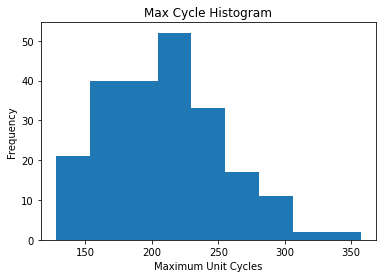

In [14]:
print("Max Cycle Histogram")

filterdata = trainDataframe.groupby(0,sort=False)[1].max()
filterdata = filterdata[filterdata.between(128,250)]

print(len(filterdata)/len(trainDataframe.groupby(0,sort=False)[1].max()))

matplot.hist(trainDataframe.groupby(0,sort=False)[1].max(), bins='sturges')
matplot.title('Max Cycle Histogram')
matplot.xlabel('Maximum Unit Cycles')
matplot.ylabel('Frequency')


Operation Value Hist Box Plot


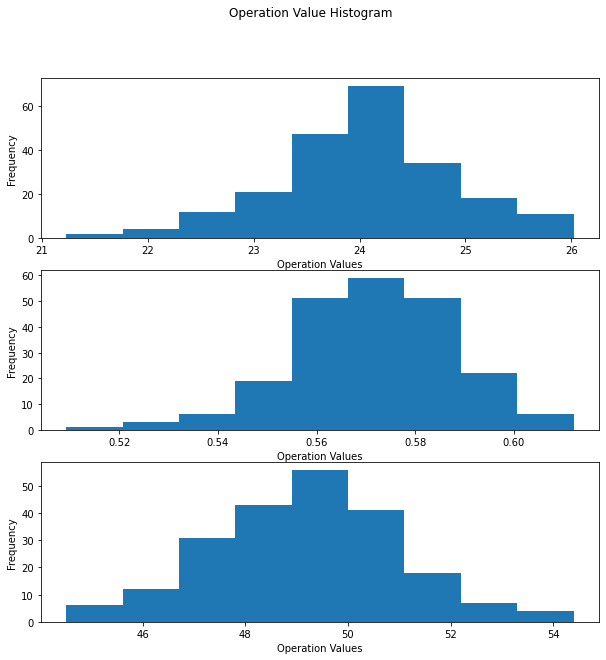

In [22]:
print("Operation Value Hist Box Plot")

fig, axs = matplot.subplots(3,figsize=(10, 10))

axs[0].hist(trainDataframe.groupby(0,sort=False)[2].mean(), bins='sturges')
axs[1].hist(trainDataframe.groupby(0,sort=False)[3].mean(), bins='sturges')
axs[2].hist(trainDataframe.groupby(0,sort=False)[4].mean(), bins='sturges')

fig.suptitle("Operation Value Histogram")
axs[0].set_xlabel("Operation Values")
axs[0].set_ylabel("Frequency")

axs[1].set_xlabel("Operation Values")
axs[1].set_ylabel("Frequency")

axs[2].set_xlabel("Operation Values")
axs[2].set_ylabel("Frequency")


matplot.show()



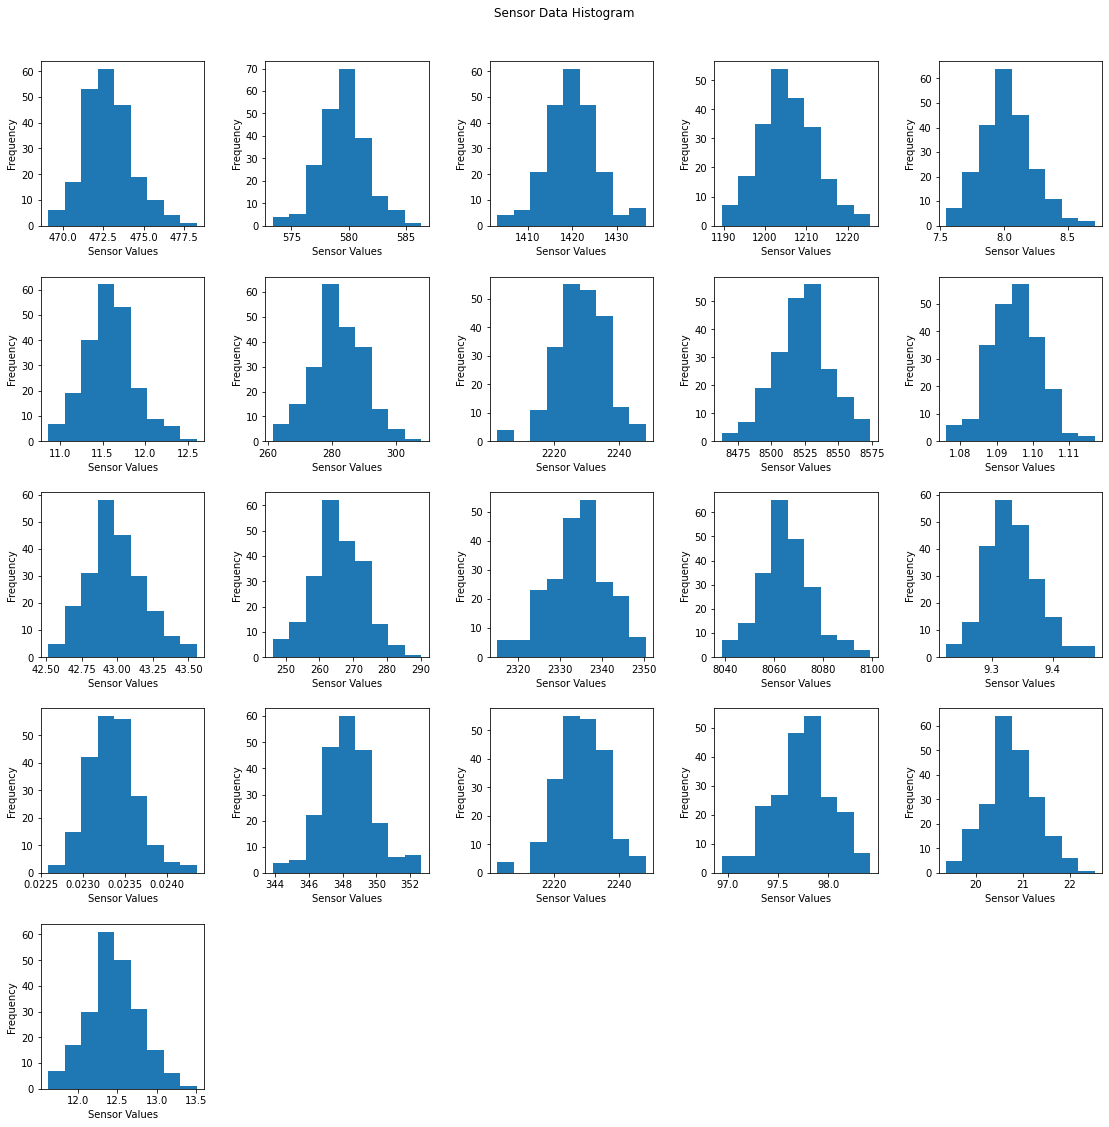

In [35]:
fig, axs = matplot.subplots(5,5,figsize=(16, 16))
fig.suptitle("Sensor Data Histogram")
fig.tight_layout(pad=3.0)
for column in range(0,5):
    for row in range(0,5):
        dataSetRow  = 5+column * 5 +row
        if dataSetRow <= 25:
            axs[column,row].hist(trainDataframe.groupby(0,sort=False)[dataSetRow].mean(), bins='sturges')
            axs[column,row].set_xlabel("Sensor Values")
            axs[column,row].set_ylabel("Frequency")
        else:
            axs[column,row].axis('off')
            
matplot.show()

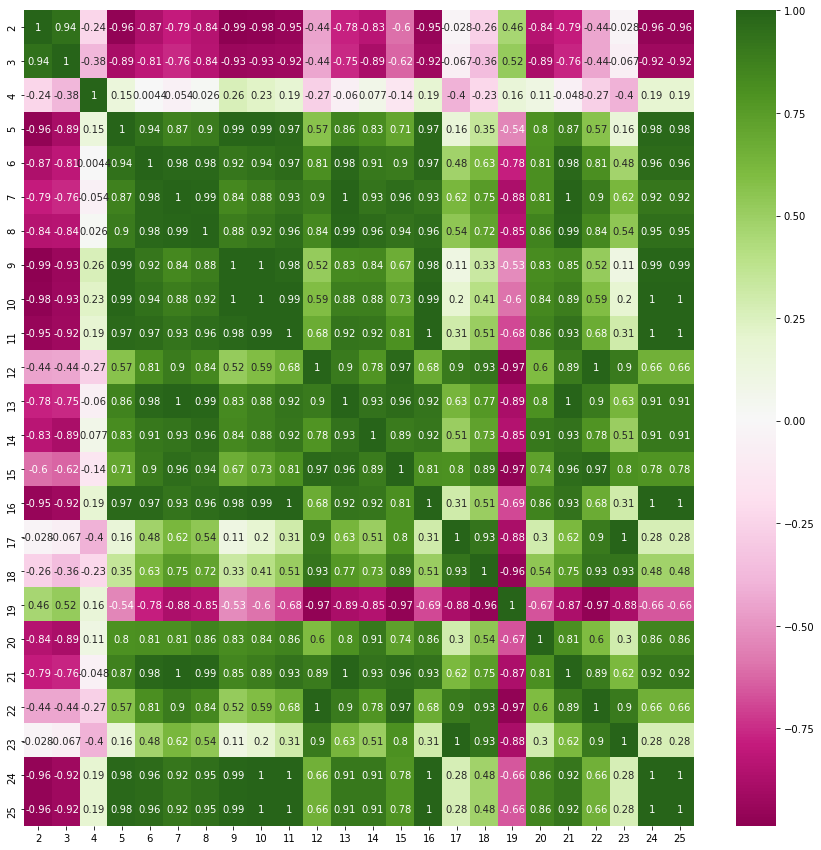

In [6]:
correlationDataSensors = trainDataframe.iloc[:,2:]

correlationMatrixSensors = correlationDataSensors.corr()
fig, ax = matplot.subplots(figsize=(15, 15))
sns.heatmap(correlationMatrixSensors, annot = True,ax=ax,cmap="PiYG")

matplot.show()

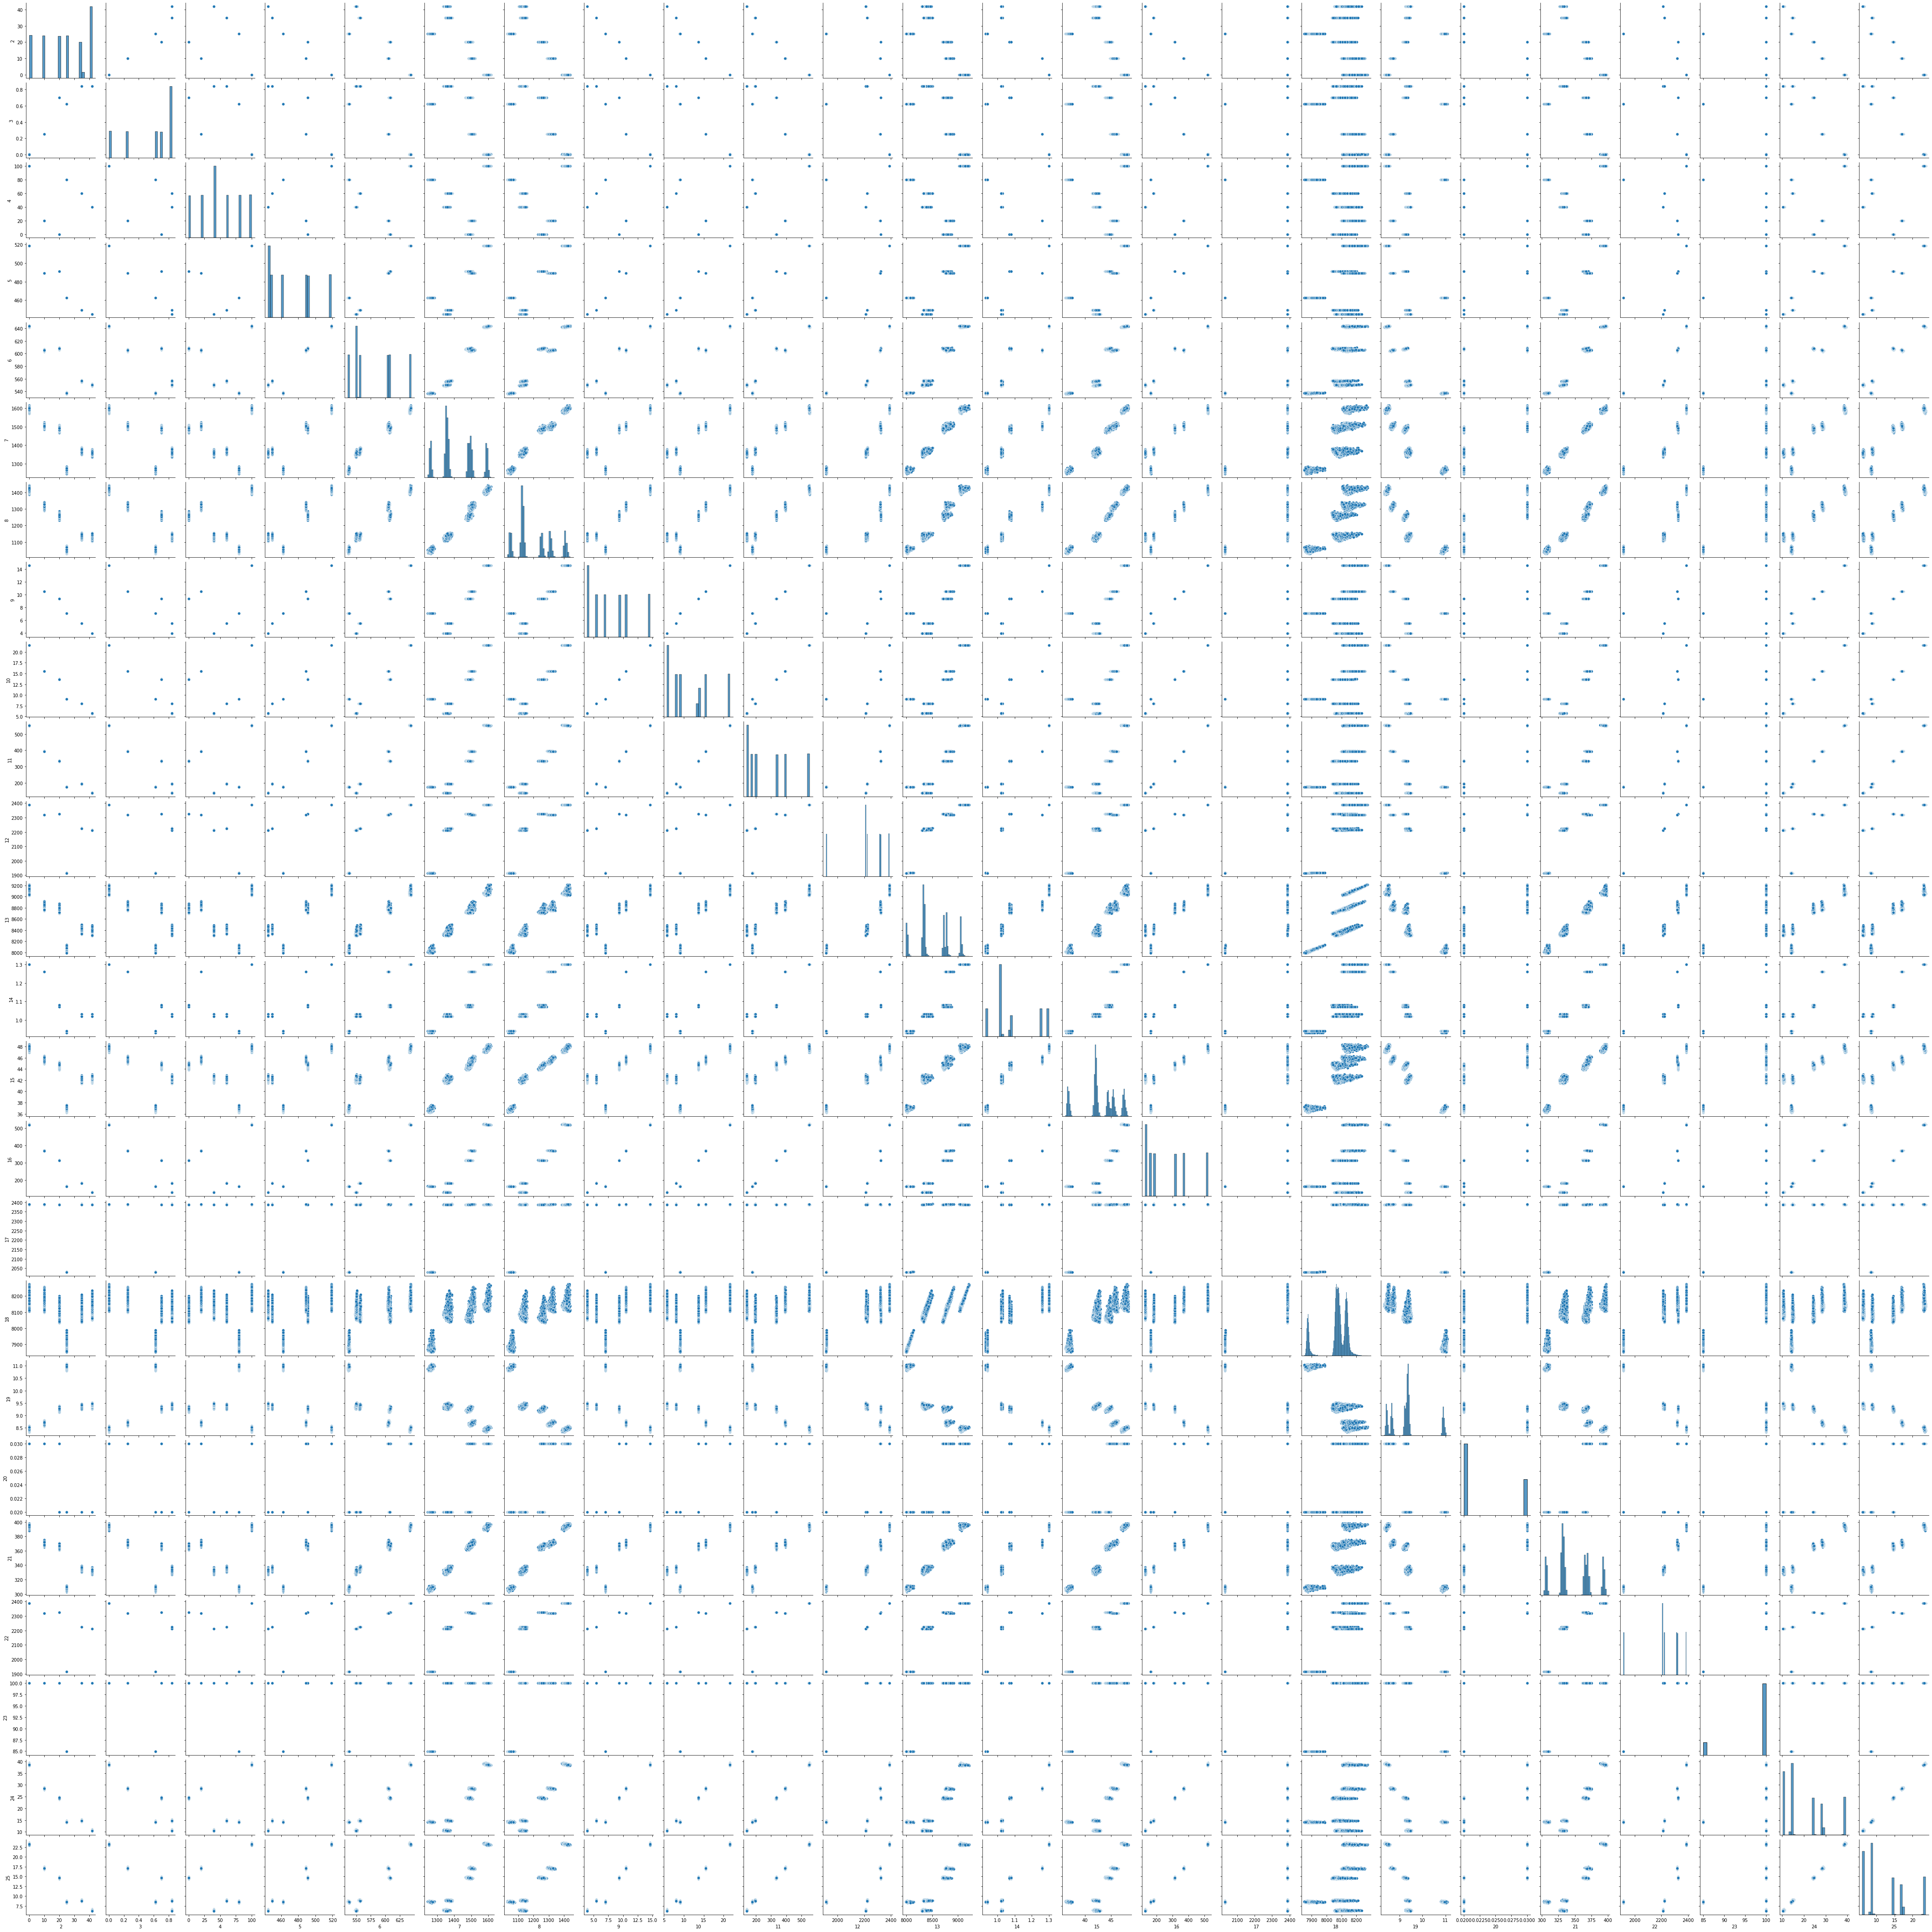

In [7]:
sns.pairplot(correlationDataSensors)

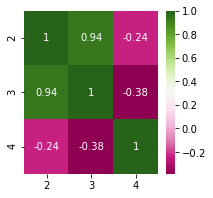

In [14]:

correlationOperationSensors = trainDataframe.iloc[:,2:5]
correlationMatrixOperation = correlationOperationSensors.corr()
fig, ax = matplot.subplots(figsize=(3, 3))
sns.heatmap(correlationMatrixOperation, annot = True,ax=ax,cmap="PiYG")

matplot.show()


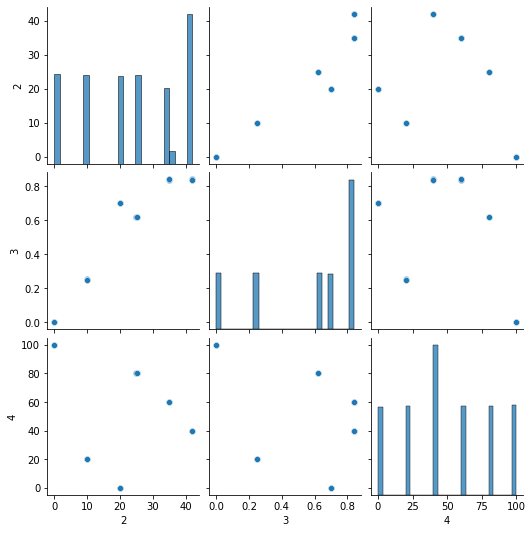

In [12]:
sns.pairplot(correlationOperationSensors)

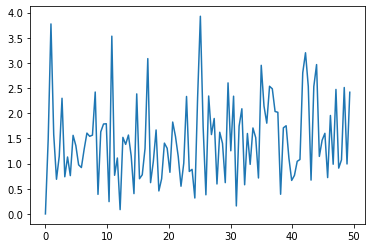

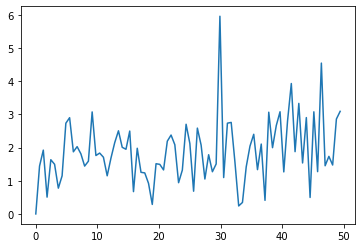

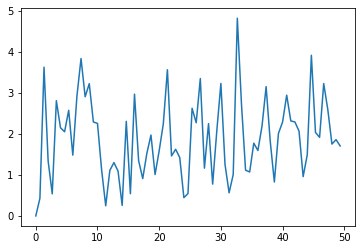

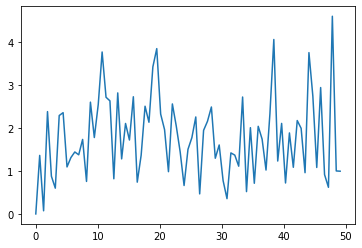

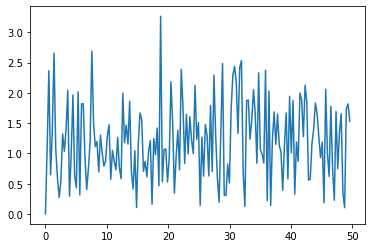

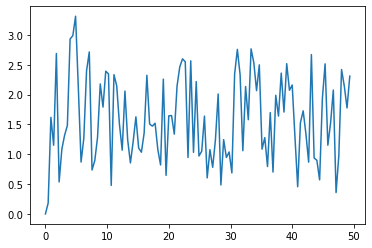

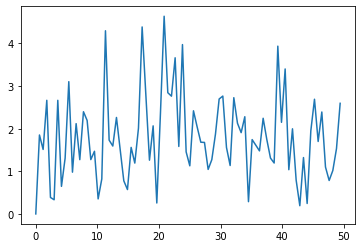

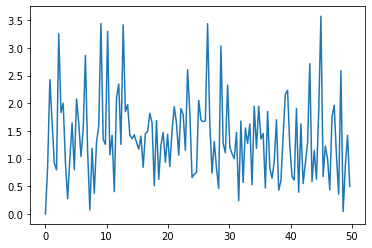

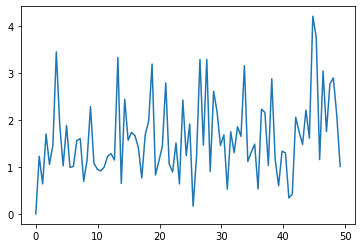

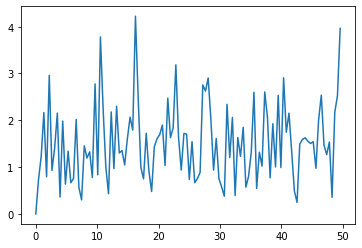

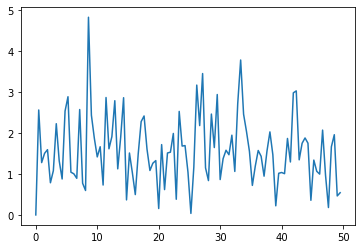

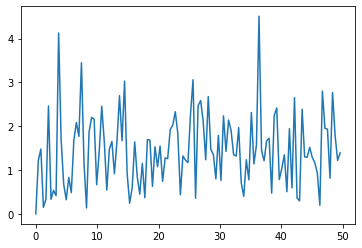

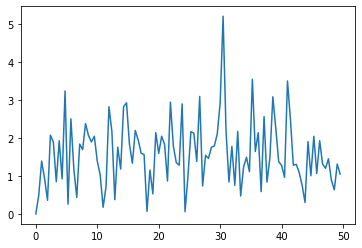

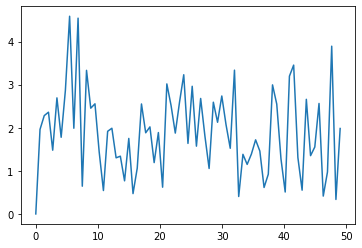

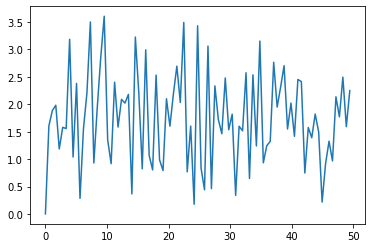

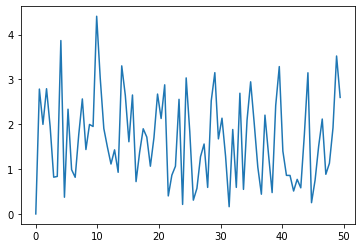

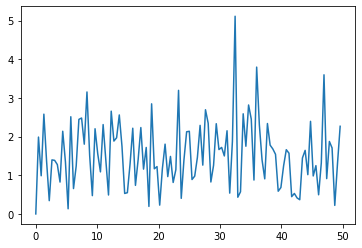

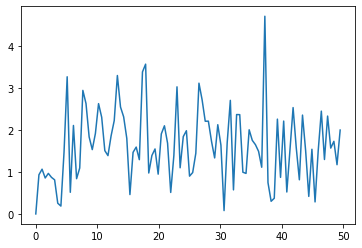

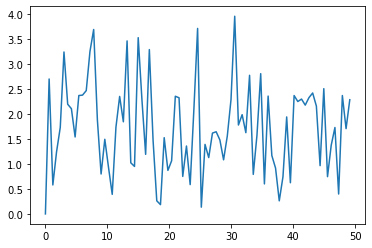

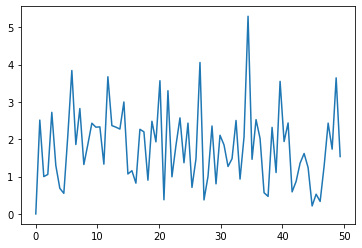

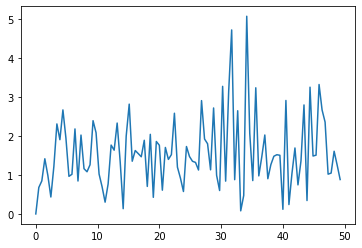

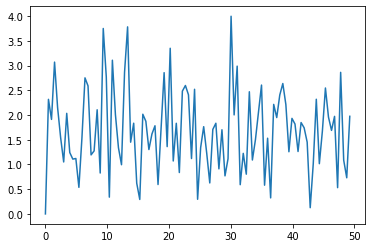

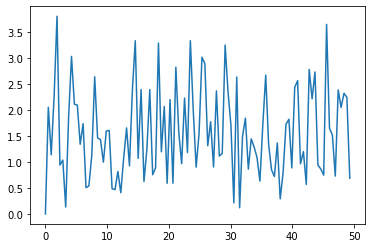

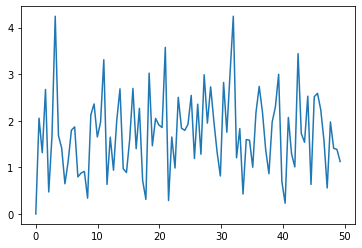

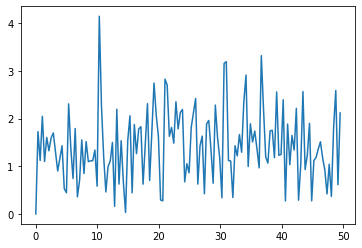

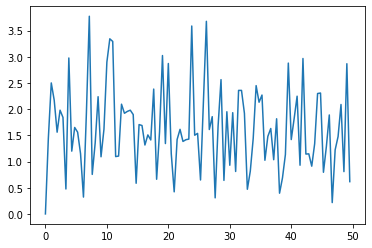

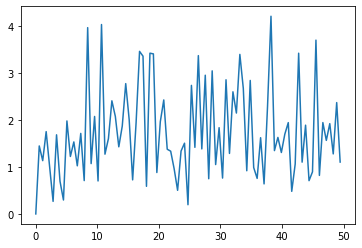

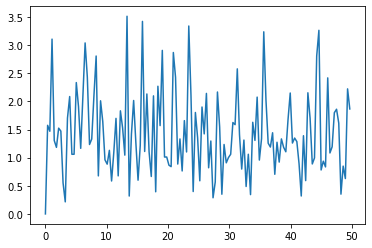

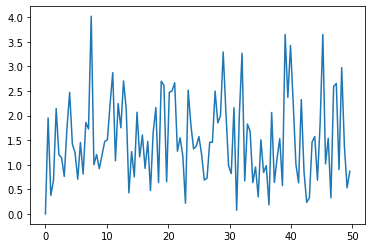

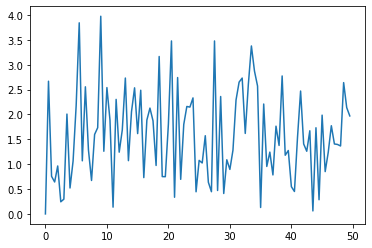

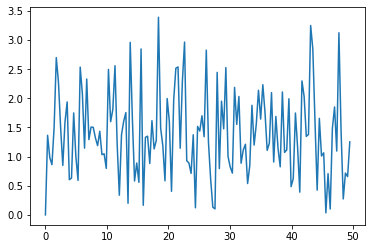

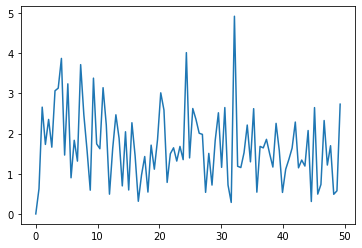

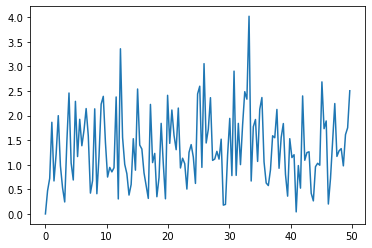

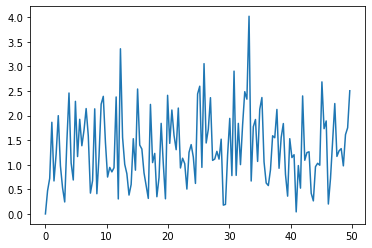

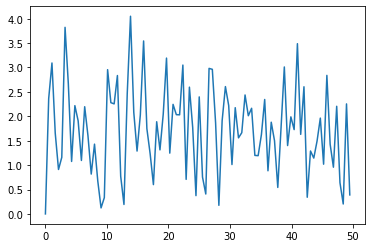

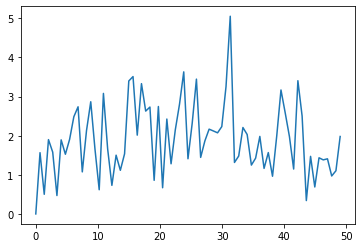

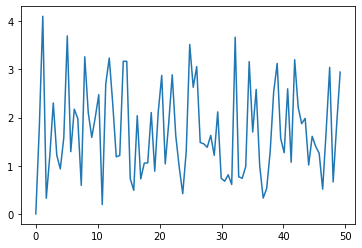

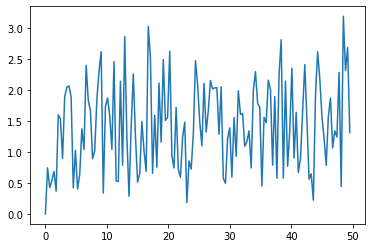

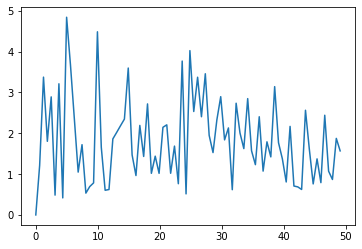

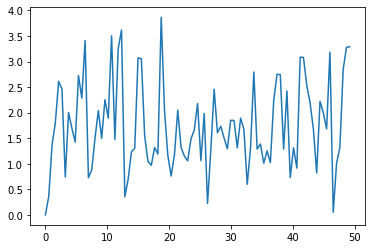

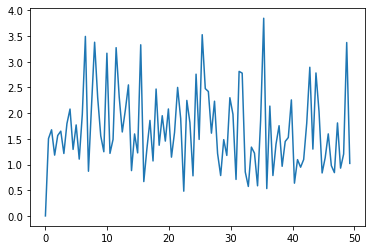

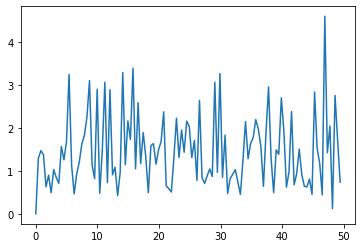

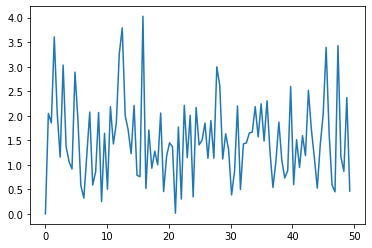

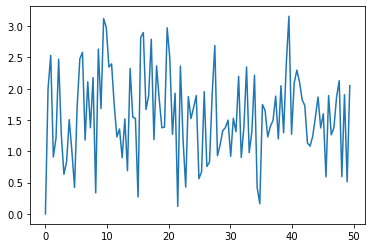

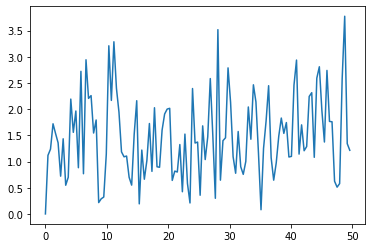

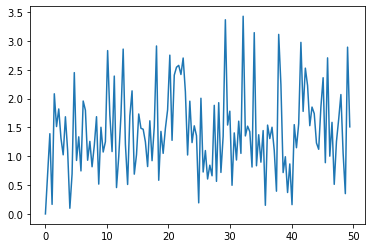

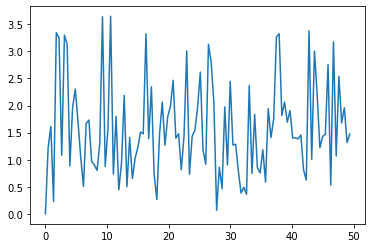

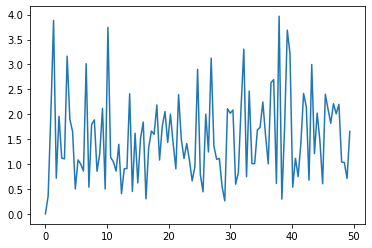

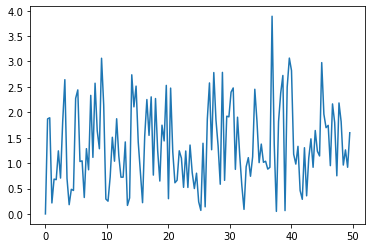

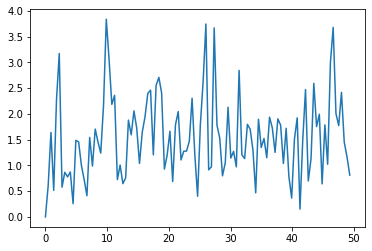

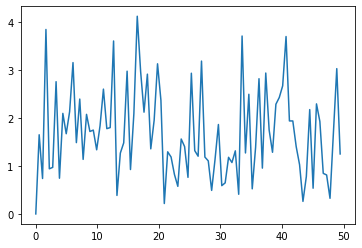

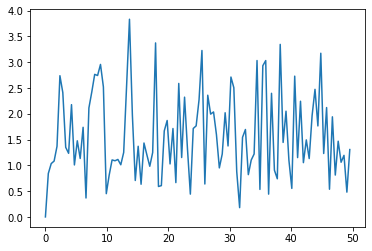

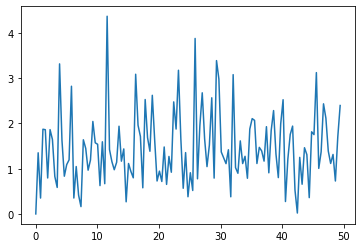

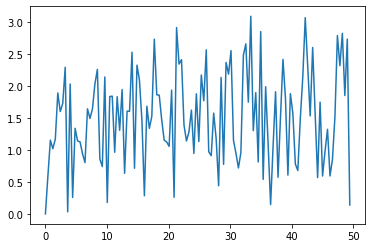

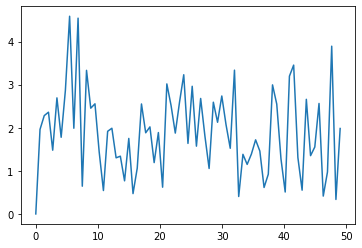

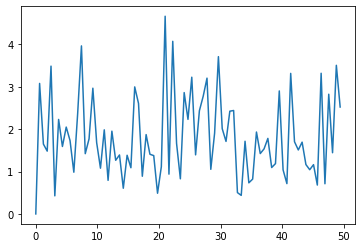

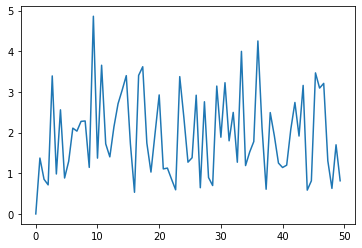

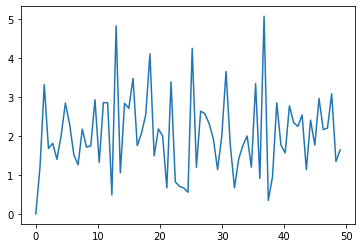

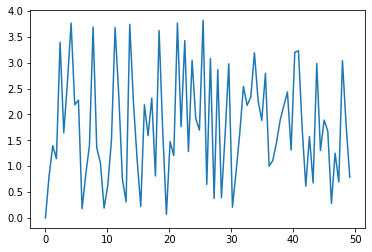

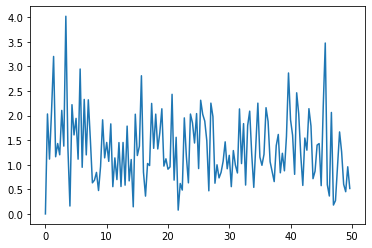

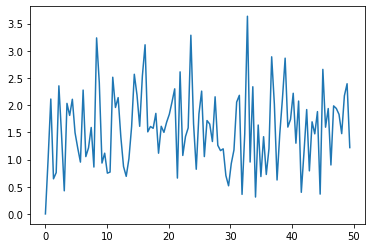

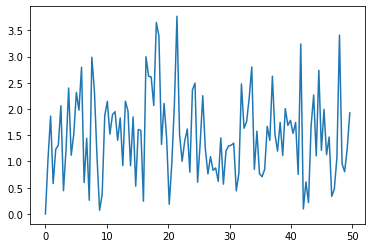

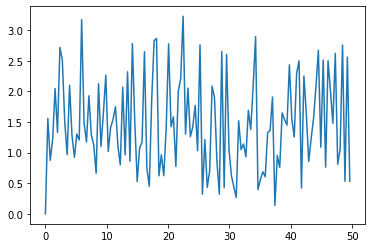

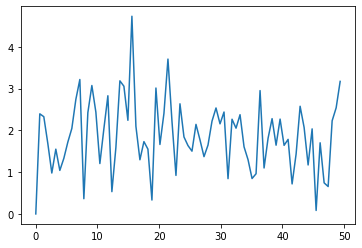

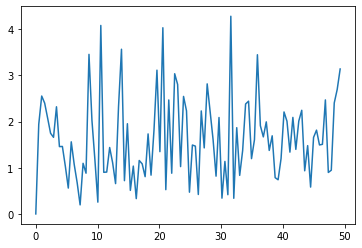

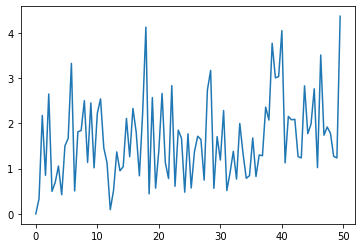

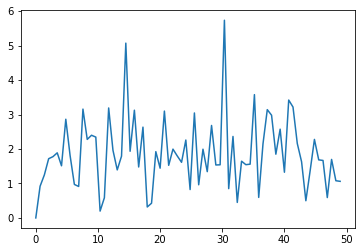

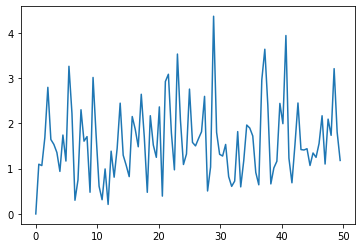

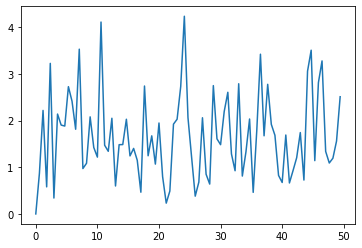

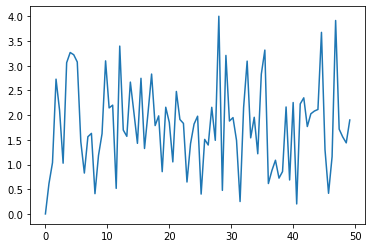

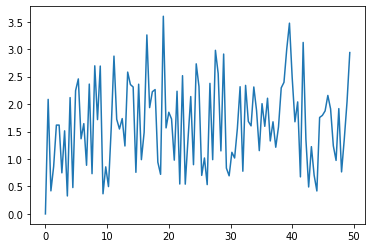

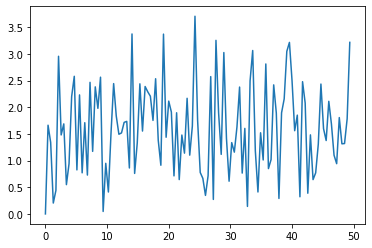

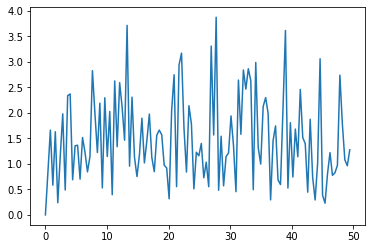

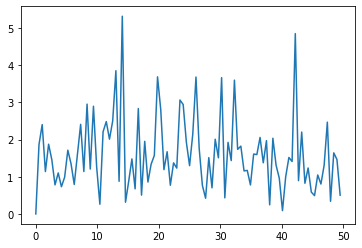

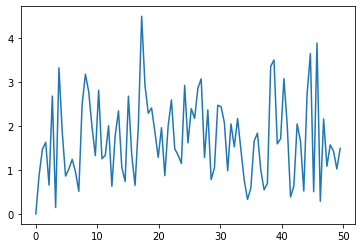

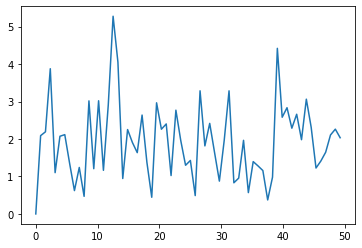

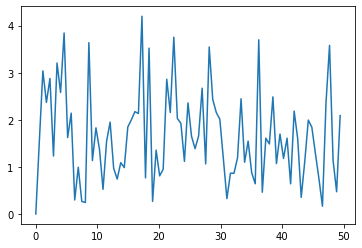

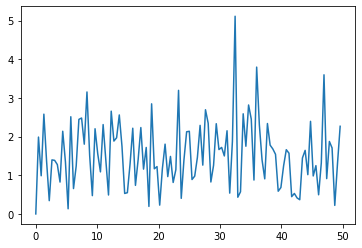

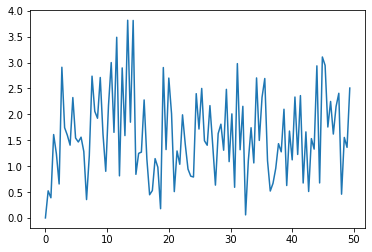

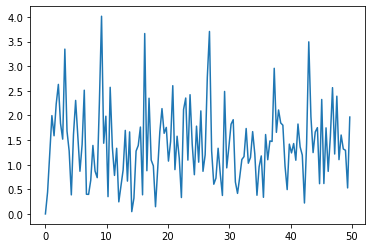

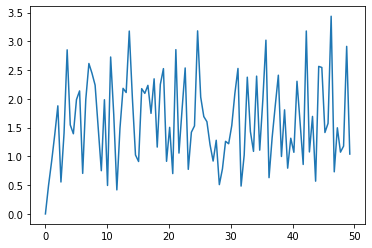

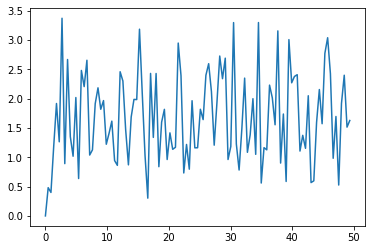

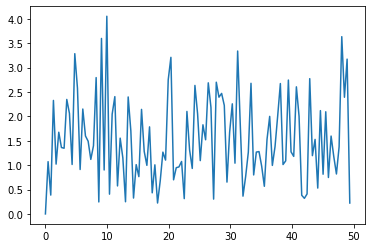

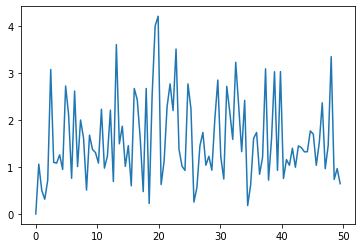

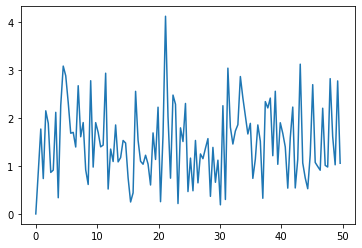

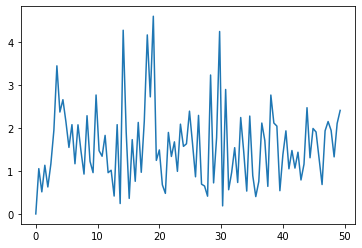

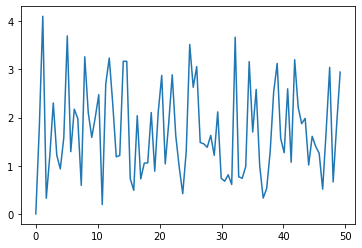

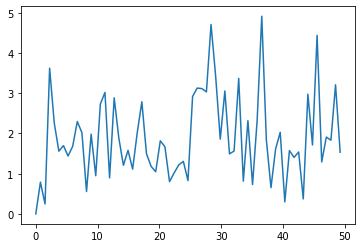

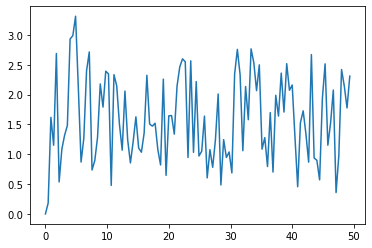

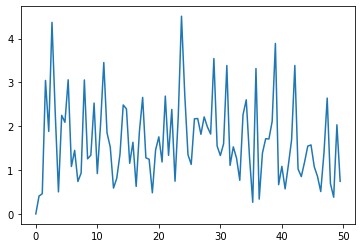

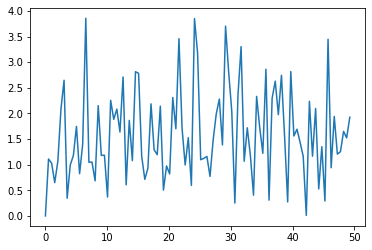

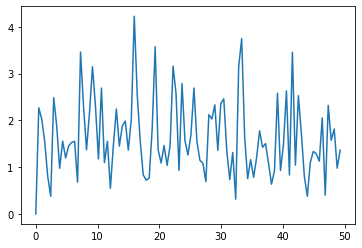

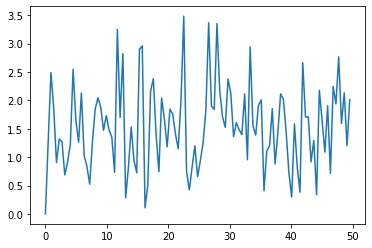

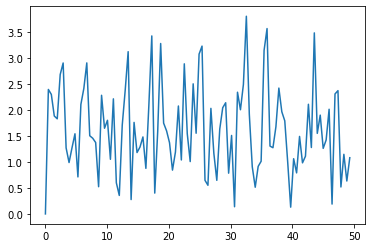

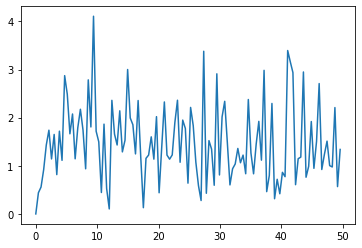

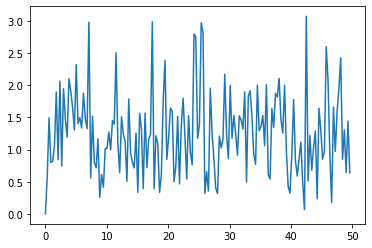

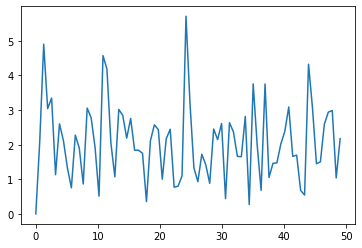

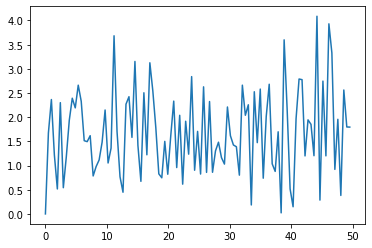

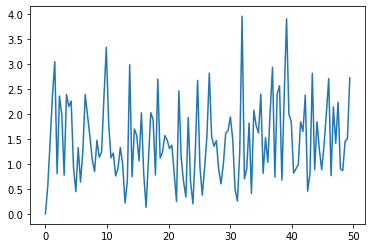

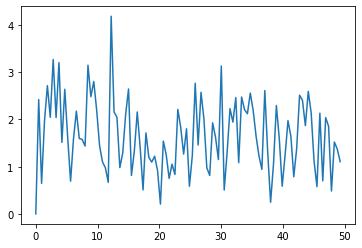

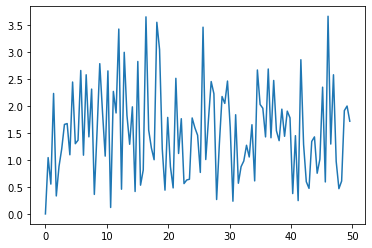

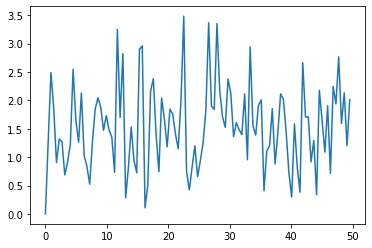

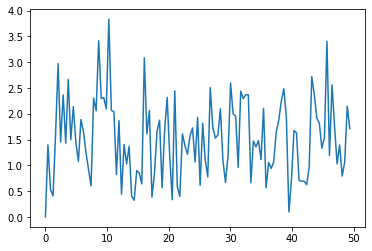

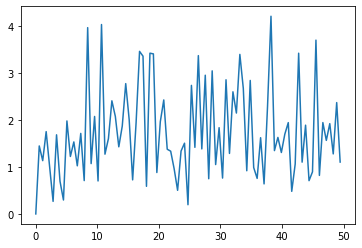

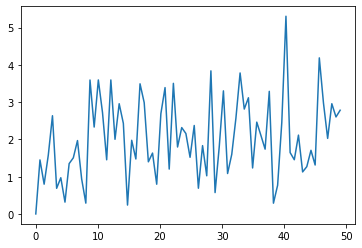

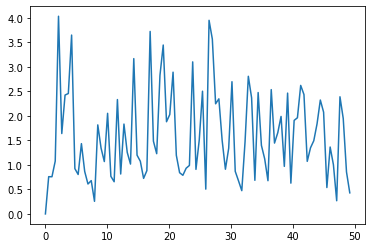

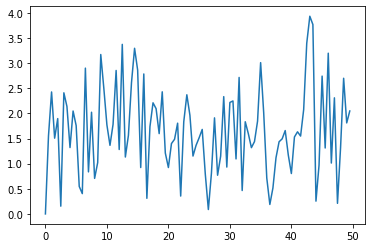

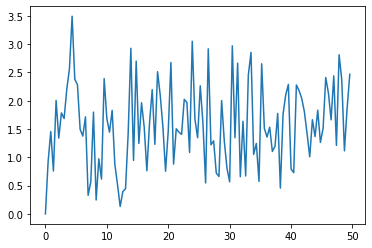

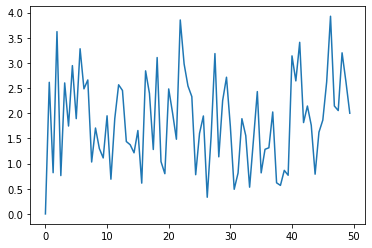

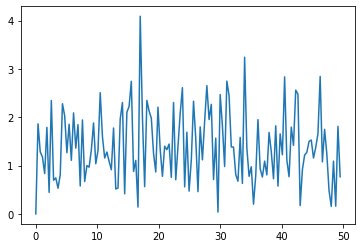

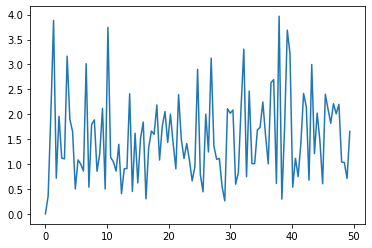

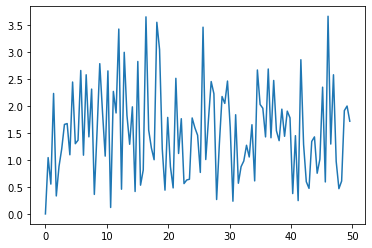

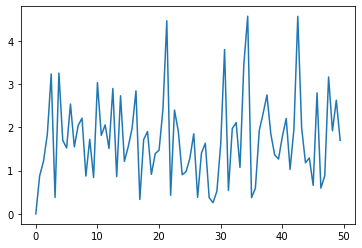

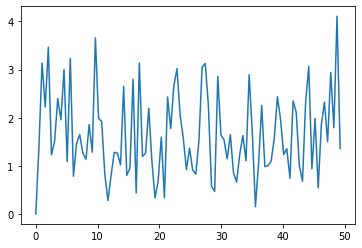

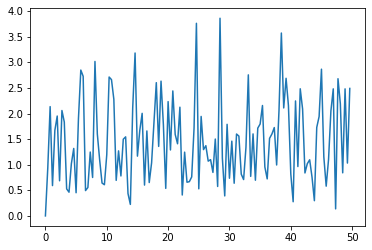

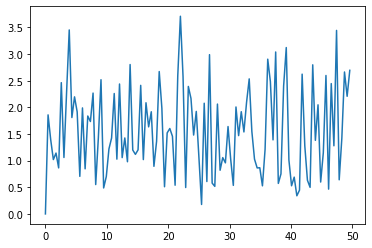

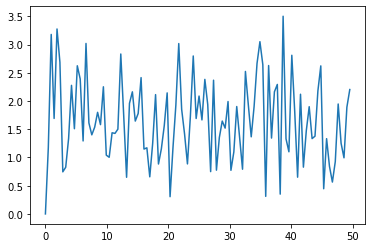

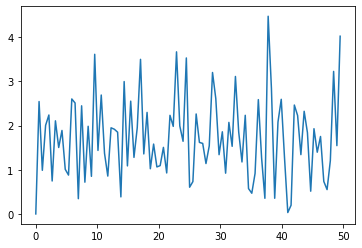

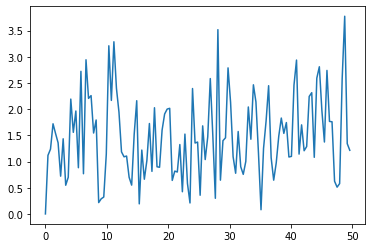

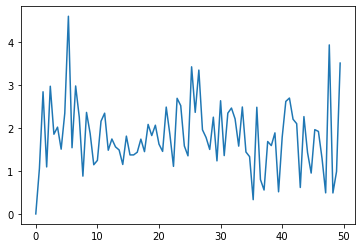

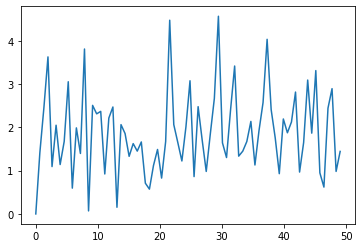

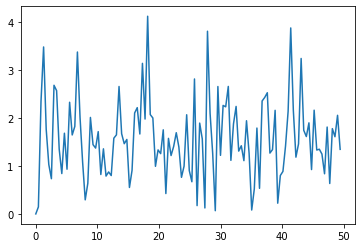

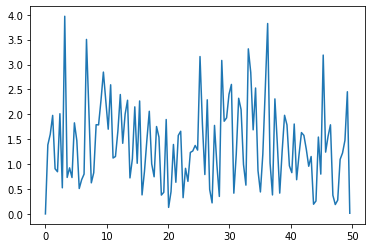

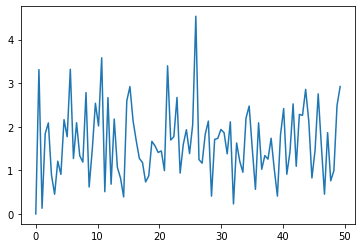

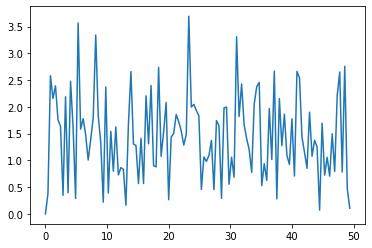

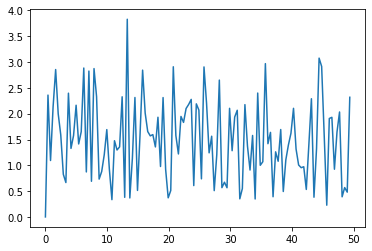

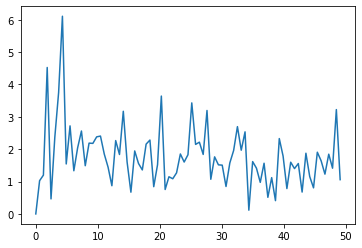

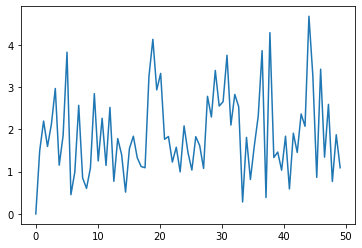

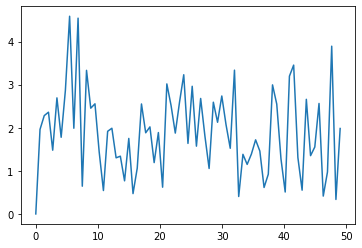

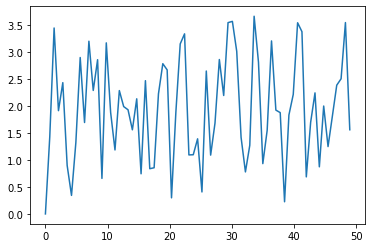

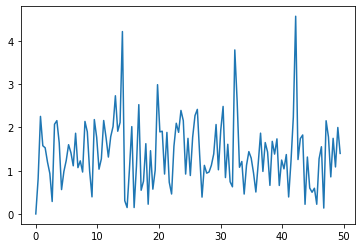

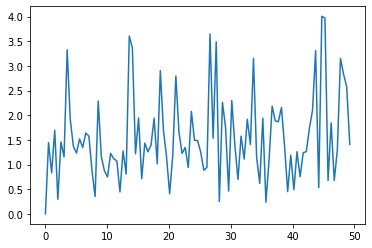

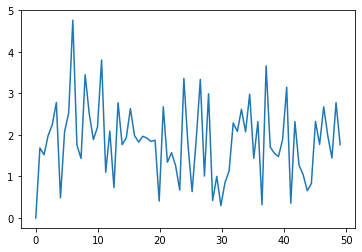

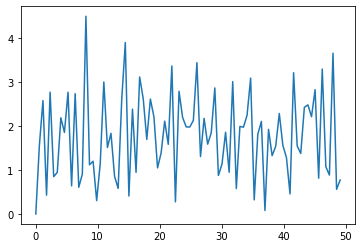

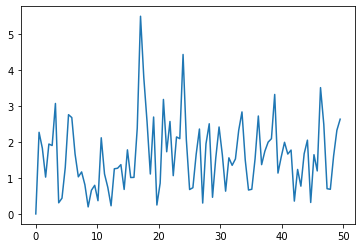

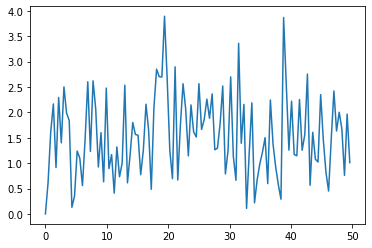

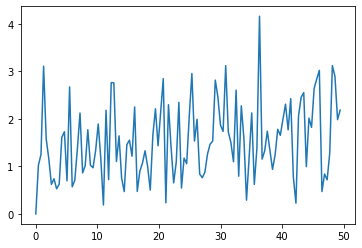

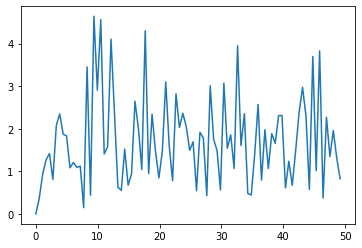

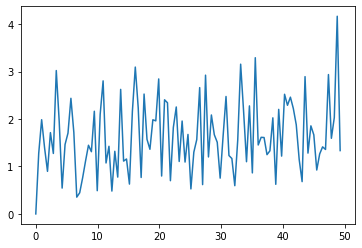

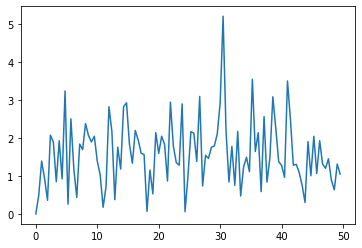

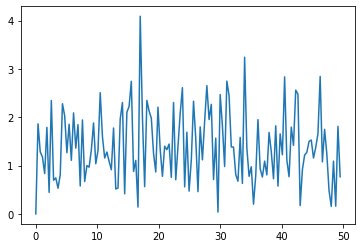

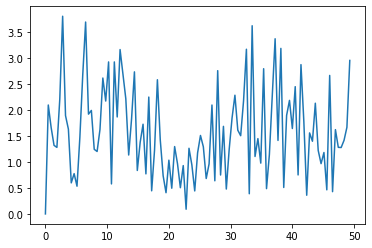

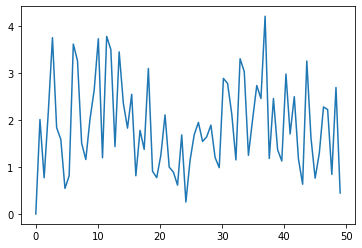

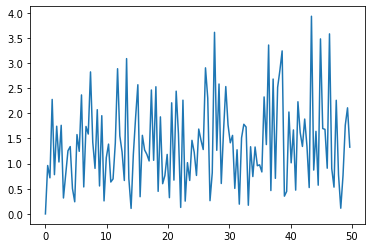

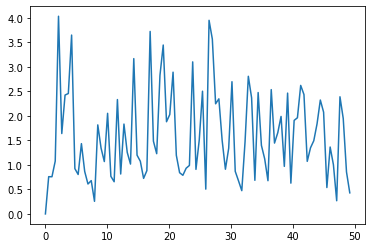

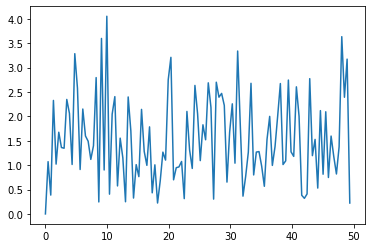

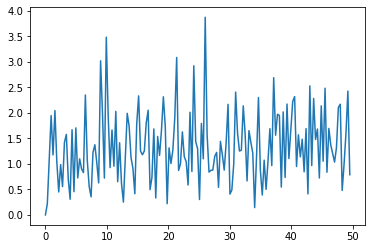

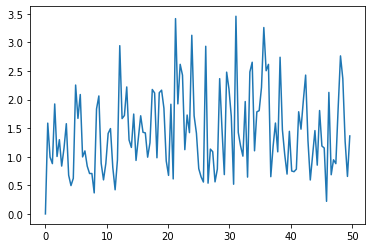

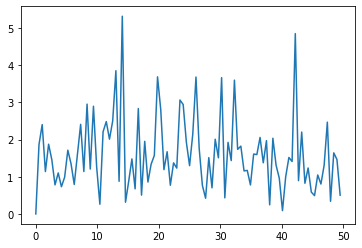

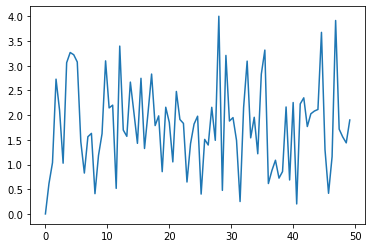

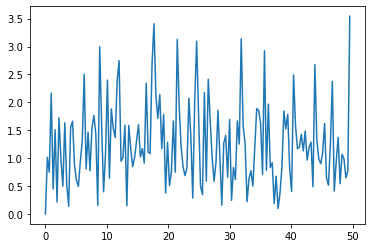

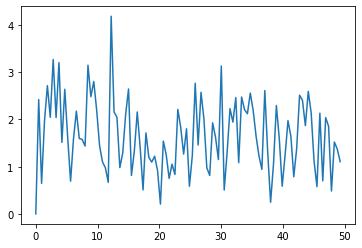

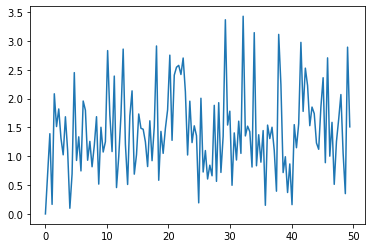

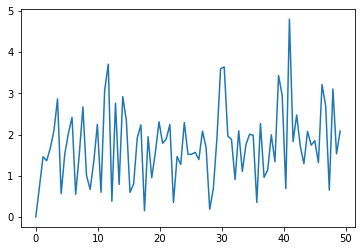

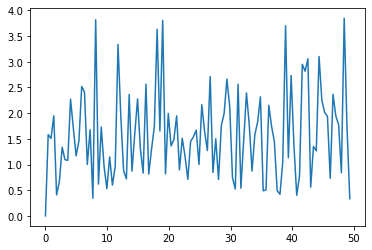

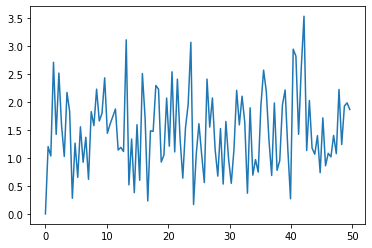

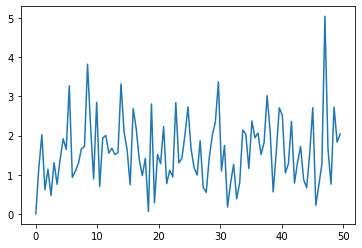

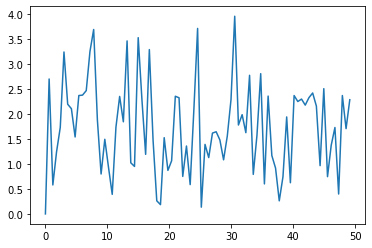

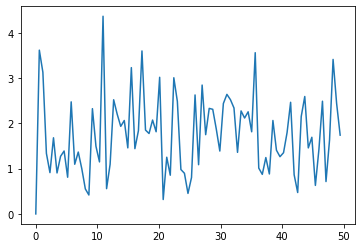

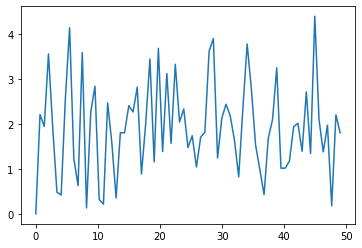

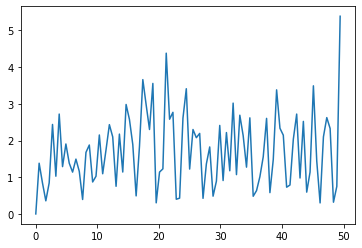

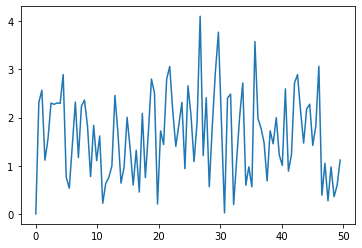

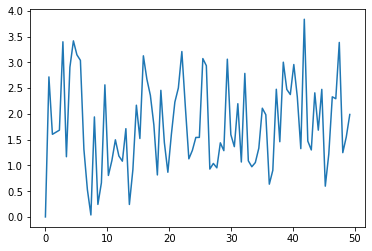

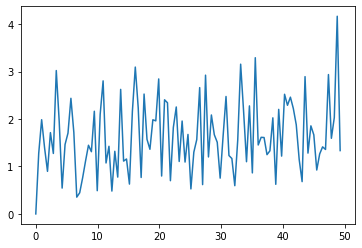

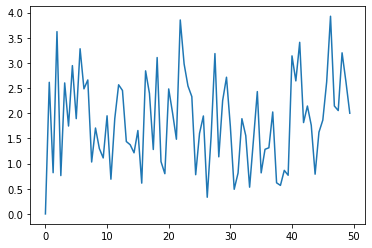

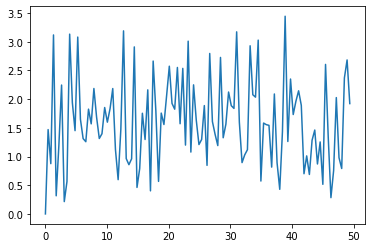

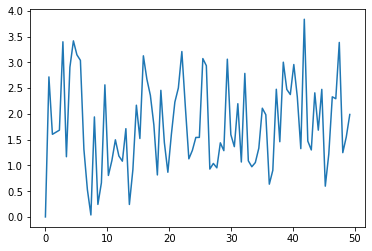

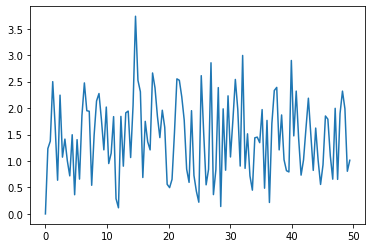

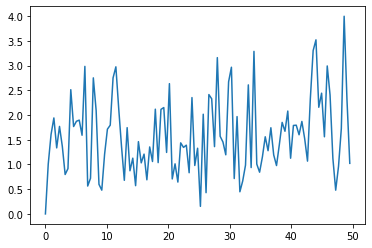

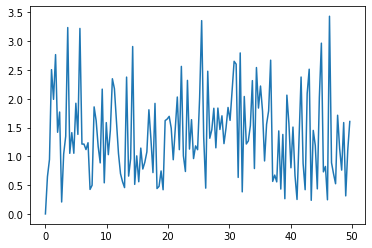

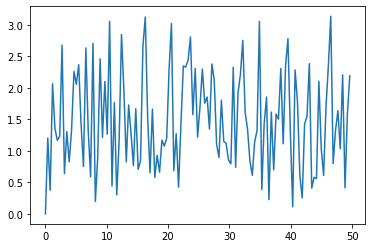

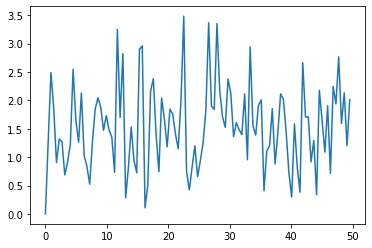

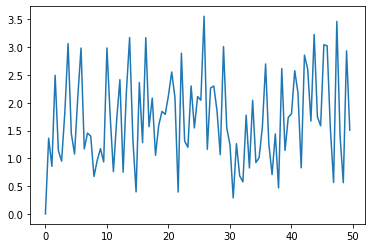

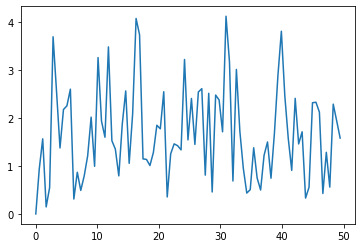

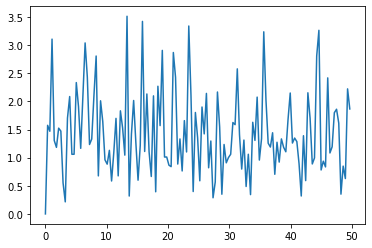

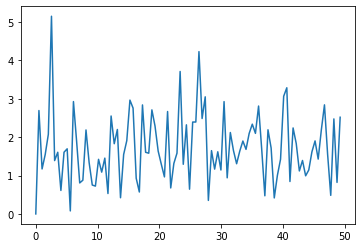

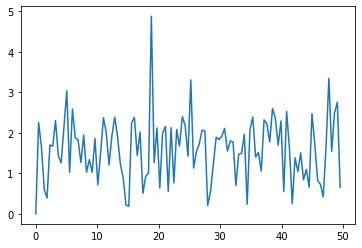

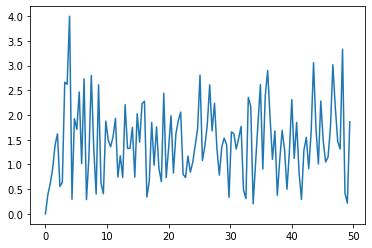

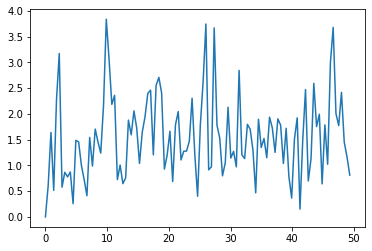

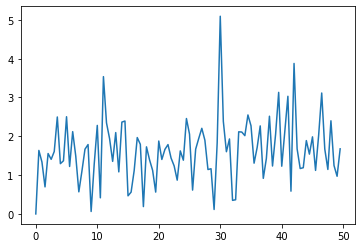

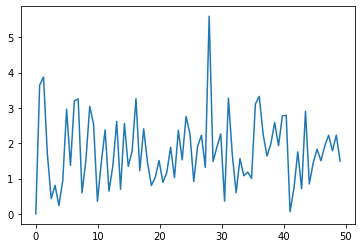

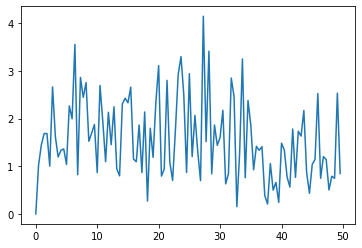

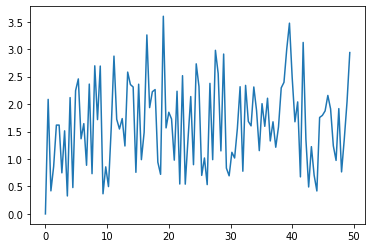

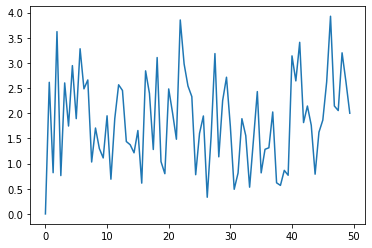

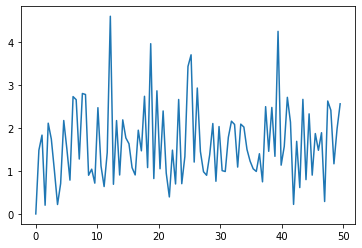

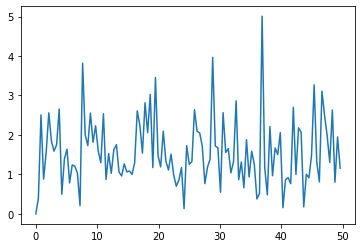

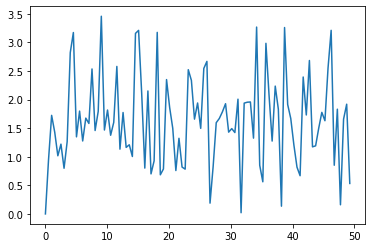

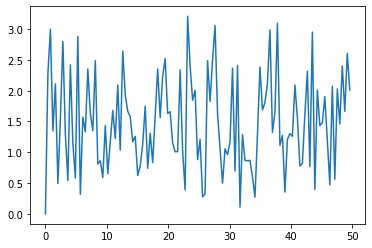

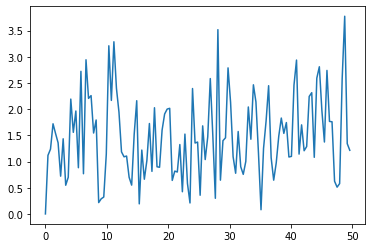

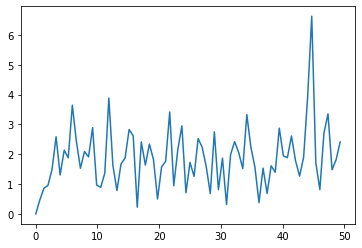

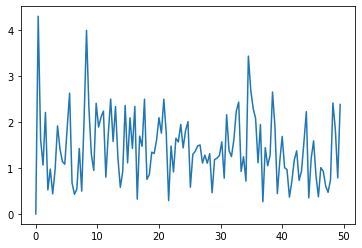

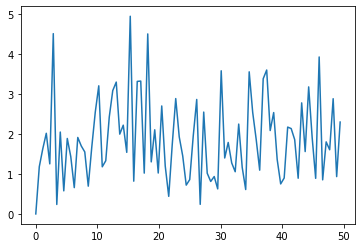

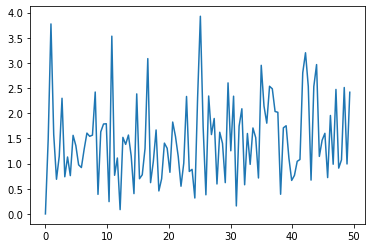

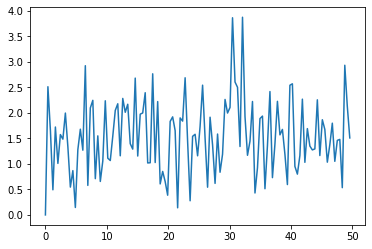

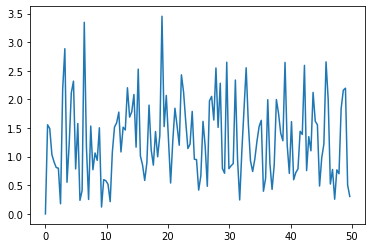

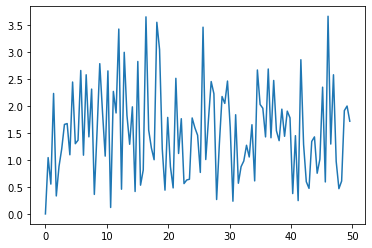

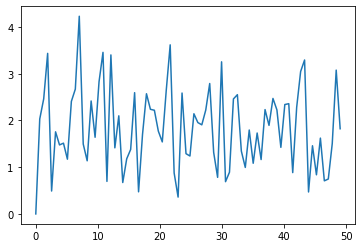

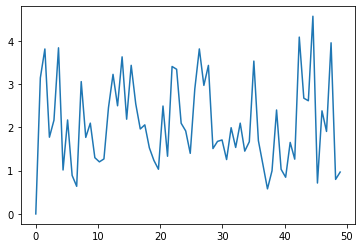

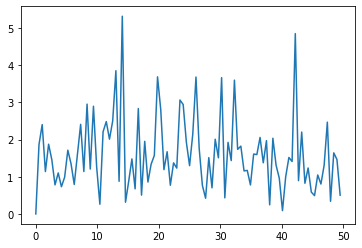

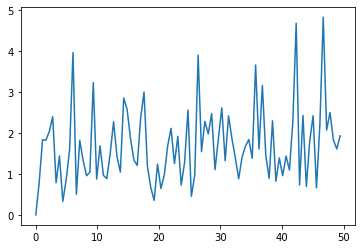

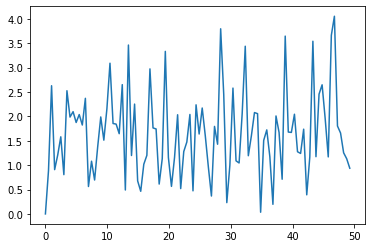

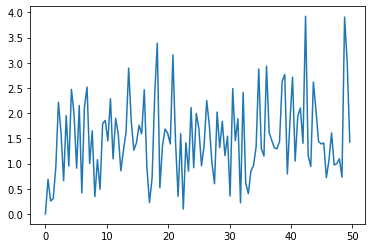

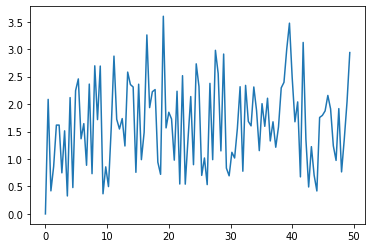

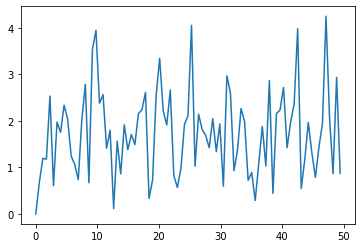

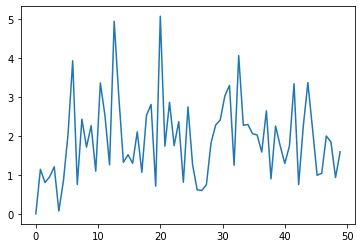

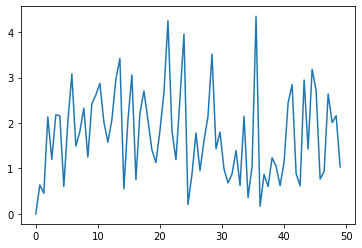

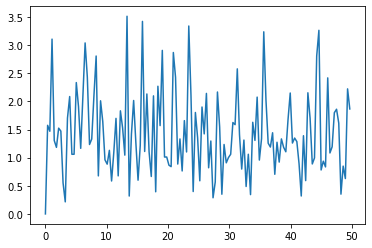

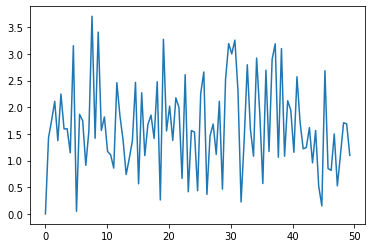

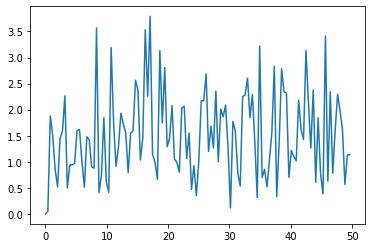

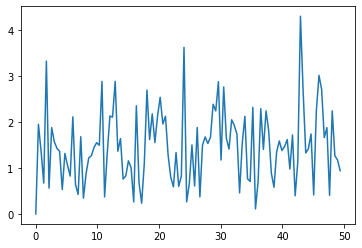

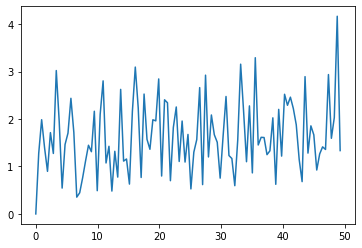

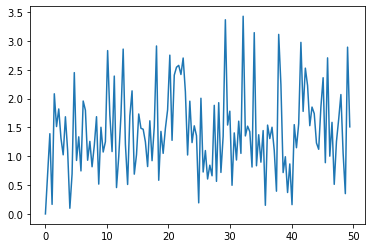

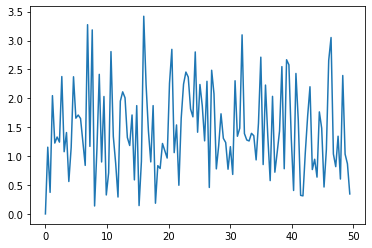

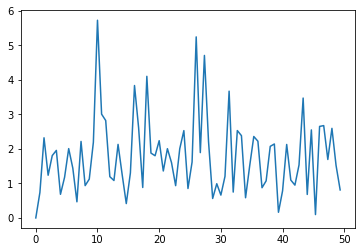

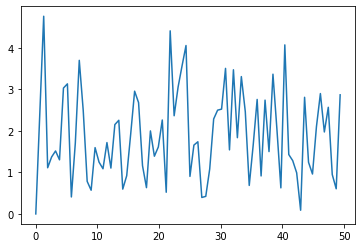

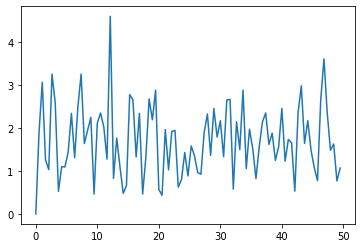

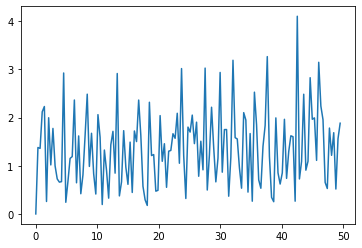

In [92]:
# How many time points are needed i,e., Sampling Frequency
import numpy as np
import scipy.signal as signal



for machineNumber in range(1,trainDataframe[0].max()):
    machine = trainDataframe[trainDataframe[0] == machineNumber]
    sensorData = machine[sensorNumber]
    sensorData = signal.detrend(sensorData)

    samplingFrequency   = 100;

 

    # At what intervals time points are sampled

    samplingInterval       = 1 / samplingFrequency;

 

    # Begin time period of the signals

    beginTime           = 0;

 

    # End time period of the signals

    endTime             = 10; 

 
    
    fourierTransform = np.fft.fft(sensorData)/len(sensorData)           # Normalize amplitude

    fourierTransform = fourierTransform[range(int(len(sensorData)/2))] # Exclude sampling frequency
    tpCount     = len(sensorData)

    values      = np.arange(int(tpCount/2))

    timePeriod  = tpCount/samplingFrequency

    frequencies = values/timePeriod
    
    #frequencies = np.fft.fftfreq(len(sensorData), machine[1].max() - machine[1].min())
    #frequencies = frequencies[range(int(len(sensorData)/2))]
    
    matplot.plot(frequencies,abs(fourierTransform))
    matplot.show()
  
    
